In [6]:
!python track.py --source /yuzukihaga/CCTV2022/labelImg/pre_20221031/input --yolo_model yolov5s.pt --save-vid --save-crop --save-txt

/Users/yuzukihaga/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
/Users/yuzukihaga/CCTV2022/Yolov5_DeepSort_OSNet/torchreid/metrics/rank.py:11: UserWarning: Cython evaluation (very fast so highly recommended) is unavailable, now use python evaluation.
  warnings.warn(
Traceback (most recent call last):
  File "track.py", line 31, in <module>
    from deep_sort.utils.parser import get_config
  File "/Users/yuzukihaga/CCTV2022/Yolov5_DeepSort_OSNet/deep_sort/__init__.py", line 1, in <module>
    from .deep_sort import DeepSort
  File "/Users/yuzukihaga/CCTV2022/Yolov5_DeepSort_OSNet/deep_sort/deep_sort.py", line 7, in <module>
    from .sort.nn_matching import NearestNeighborDistanceMetric
  File "/Users/yuzukihaga/CCTV202

In [4]:
%cd
%cd ./CCTV2022/Yolov5_DeepSort_OSNet/

import matplotlib.pyplot as plt
import pandas as pd
import cv2

/Users/yuzukihaga
/Users/yuzukihaga/CCTV2022/Yolov5_DeepSort_OSNet


frameid class x y h w ? ? ? ?

In [5]:
file = pd.read_csv("./runs/track/cctv_best_osnet_x0_255/tracks/Jingubashi.txt", header=None, delim_whitespace=True, names=["frame_id", "id", "xmin", "ymin", "height", "width", "b", "c", "d", "e"])
df = pd.DataFrame(file)
df = df.drop(columns=["b", "c", "d", "e"], axis=1)
df.head()

,frame_id,id,xmin,ymin,height,width
0,3,1,747,316,152,143
1,4,1,740,315,151,130
2,5,1,736,310,139,124
3,6,1,733,302,132,128
4,7,1,725,297,137,125


In [6]:
# plot bbox center points
frame = df['frame_id'].head()
xmin, ymin, height, width = df['xmin'], df['ymin'], df['height'], df['width']
center_x = xmin + 1/2 * width
center_y = ymin + 1/2 * height
#print(center_x, center_y)
df["center_x"] = center_x
df["center_y"] = center_y
df.head()

,frame_id,id,xmin,ymin,height,width,center_x,center_y
0,3,1,747,316,152,143,818.5,392.0
1,4,1,740,315,151,130,805.0,390.5
2,5,1,736,310,139,124,798.0,379.5
3,6,1,733,302,132,128,797.0,368.0
4,7,1,725,297,137,125,787.5,365.5


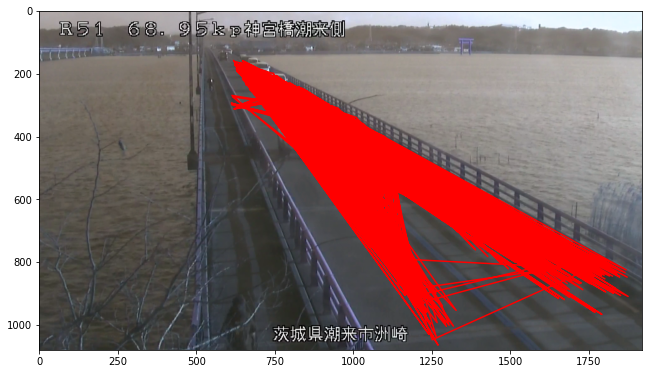

In [7]:
# read img size
im = cv2.imread("Jingubashi.png")

#print(im.shape)
im_h, im_w, im_c = im.shape

fig = plt.figure(figsize=(im_h*0.01, im_w*0.01))
ax = fig.add_subplot(1, 1, 1)

ax.plot(center_x, center_y, color='red')

ax.imshow(im)

In [13]:
%cd 
%cd ./CCTV2022/Yolov5_DeepSort_OSNet

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patch
import csv
import pandas as pd
import cv2
from PIL import Image

/Users/yuzukihaga
/Users/yuzukihaga/CCTV2022/Yolov5_DeepSort_OSNet


In [14]:
cap = cv2.VideoCapture('Jingubashi.mp4')

cap.set(cv2.CAP_PROP_POS_MSEC, 1)   # 再生位置を第２引数にミリ秒で指定
res, img = cap.read()
cv2.imwrite('Jingubashi.png', img)

True

In [1]:
%cd 
%cd ./CCTV2022/Yolov5_DeepSort_OSNet

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patch
import csv
import pandas as pd
import cv2
from PIL import Image

# 描画
def rect_plot(txtFile, jpgFile, plot):
    f = pd.read_csv(txtFile, sep=' ')
    df = pd.DataFrame(f)
    df.columns = ['frame', 'ID', 'x', 'y', 'w', 'h', 'n1', 'n2', 'n3', 'n4', 'n5']

    df = df.drop(columns=["n1", "n2", "n3", "n4", "n5"])
    sum_frame = len(df)

    fig = plt.figure(facecolor="w")
    ax = fig.add_subplot(1, 1, 1, aspect="equal")

    for ID, group in df.groupby('ID'):
        frame = group['frame']
        car_id = group['ID']
        id_max = max(car_id)
        id_min = min(car_id)
        x_min = group['x']
        y_min = group['y']
        w = group['w']
        h = group['h']
        f_max = max(frame)
        f_min = min(frame)
        #print(f_max, f_min, car_id)
            
        if plot == "scatter" :
            x_c = x_min + h / 2
            y_c = y_min + w
            color = (car_id - id_min) / (id_max - id_min)
            plt.scatter(x_c, y_c, c=frame, cmap='jet')
            
        elif plot == "rectangle" :
            for x, y, w, h, f in zip(x_min, y_min, w, h, frame):
                rect = patch.Rectangle(
                    (x, y),
                    w,
                    h,
                    edgecolor = cm.turbo((f - f_min) / (f_max - f_min)),
                    facecolor = cm.turbo((f - f_min) / (f_max - f_min)),
                    fill=True
                )
                ax.add_patch(rect)
        
        elif plot == "line" :
            x_max = x_min + h
            y_max = y_min + w
            plt.scatter(x_min, y_max, c=frame, cmap="jet")
            plt.scatter(x_max, y_max, c=frame, cmap="jet")
            
        else:
            print("division_by_zero")

    im = Image.open(jpgFile)
    plt.imshow(im, alpha=0.6)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.savefig('track.png')

/Users/yuzukihaga
/Users/yuzukihaga/CCTV2022/Yolov5_DeepSort_OSNet


      ID    x    y    w    h
0      1  740  315  151  130
1      1  736  310  139  124
2      1  733  302  132  128
3      1  725  297  137  125
4      1  722  292  130  124
...   ..  ...  ...  ...  ...
3464  80  613  163   48   48
3465  80  610  163   48   47
3466  80  610  162   47   47
3467  80  609  160   48   49
3468  80  605  157   46   49

[3469 rows x 5 columns]


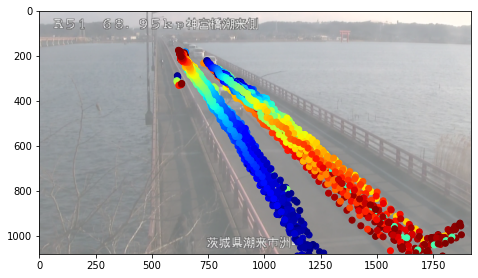

In [16]:
txtFile = "./runs/track/cctv_best_osnet_x0_255/tracks/Jingubashi.txt"
rect_plot(txtFile, 'Jingubashi.png', plot="scatter")

f = pd.read_csv(txtFile, sep=' ')
df = pd.DataFrame(f)
df.columns = ['frame', 'ID', 'x', 'y', 'w', 'h', 'n1', 'n2', 'n3', 'n4', 'n5']

df = df.drop(columns=["n1", "n2", "n3", "n4", "n5"])
df = df.loc[:,['ID', 'x', 'y', 'w', 'h']]
print(df)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

# calculate centerline if plots are on the line
# main_list:線上の点を抽出してリスト化
def line_judge(df):

    main_list = []

    y_list = df.loc[:,'y'].values
    x_list = df.loc[:,'x'].values

    for height in range(0, 1080):
        sub_list = []
        for x, y in zip(x_list, y_list):
            if y == height :
                sub_list.append(x)
            
        main_list.append(sub_list)
    return main_list

In [18]:
# 数直線グラフにする
def plot_line(main_list, height, im_w):
    fig, ax=plt.subplots(figsize=(10,10))
    fig.set_figheight(1)
    ax.tick_params(labelbottom=True, bottom=False)
    ax.tick_params(labelleft=False, left=False)
    
    xmin, xmax= 0, im_w #数直線の最小値・最大値
    plt.tight_layout() #グラフの自動調整
    plt.scatter(main_list.get(''.format(height)),y ,c='r') #散布図
    plt.hlines(y=0,xmin=xmin,xmax=xmax) #横軸
    line_width=100#目盛り数値の刻み幅
    plt.xticks(np.arange(xmin,xmax+line_width,line_width)) #目盛り数値
    pylab.box(False) #枠を消す

In [19]:
main_list = line_judge(df)

In [20]:
plt.clf()
fig = plt.figure()
x = []
y = []
for i in range(im_h):
    s = main_list[i]
    if len(s) >= 1:
        a=np.array(s)
        a2=np.log2(a)
        minval, maxval = a2.min(), a2.max()

        kde = KernelDensity(kernel='gaussian', bandwidth=0.9).fit(a2.reshape(-1,1))
        s = np.linspace(minval, maxval, im_h)
        e = kde.score_samples(s.reshape(-1, 1))

        mi = argrelextrema(e, np.less)[0]

        for j in range(0, len(s[mi])):
            a3 = a[(a2 >= minval) * (a2 <= s[mi][j])]
            minval = s[mi][j]
            mean_a3 = np.mean(a3)
            print(a3)
            
        a4 = a[(a2 >= minval)]
        mean_a4 = np.mean(a4)
        
        mid_line = (mean_a3 + mean_a4) / 2
        print(i)
        print(mean_a4)
        print(mid_line)
        print("---")
        x.append(mid_line)
        y.append(i)
plt.figure(dpi=144)
plt.plot(x, y)
plt.imshow(im, alpha=1)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig('mid_plot.png')

NameError: name 'KernelDensity' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [21]:
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema
import seaborn as sns
import numpy

# KDEで中心を求める
# k=車線数，求めたいy座標
def kdeplot(height, sub_list):
    if len(sub_list) > 0:
        a=np.array(sub_list)
        a2=np.log2(a)
        minval, maxval = a2.min(), a2.max()

        kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(a2.reshape(-1,1))
        s = np.linspace(minval, maxval, 1024)
        e = kde.score_samples(s.reshape(-1, 1))

        mi = argrelextrema(e, np.less)[0]

        for i in range(0, len(s[mi])):
            print(a[(a2 >= minval) * (a2 <= s[mi][i])])
            minval = s[mi][i]
        print(a[(a2 >= minval)])

In [ ]:
# kdeplot with seaborn

In [25]:
def centerize(df):
    y_list = df.loc[:,'y'].values
    x_list = df.loc[:,'x'].values
    w_list = df.loc[:,'w'].values
    h_list = df.loc[:,'h'].values

    xc_list = x_list + w_list / 2
    yt_list = y_list + h_list
    print(df)
    return xc_list, yt_list

def kde2d(image, data):
    sns.set()
    fig, ax = plt.subplots(figsize = (10,5))
    sns.kdeplot(x=xc_list, y=yt_list, color='C3', fill=True, alpha=0.8, bw_method=0.1)
    plt.imshow(im, alpha=0.7)
    plt.savefig('2Dkde.png')

      ID    x    y    w    h
0      1  740  315  151  130
1      1  736  310  139  124
2      1  733  302  132  128
3      1  725  297  137  125
4      1  722  292  130  124
...   ..  ...  ...  ...  ...
3464  80  613  163   48   48
3465  80  610  163   48   47
3466  80  610  162   47   47
3467  80  609  160   48   49
3468  80  605  157   46   49

[3469 rows x 5 columns]


NameError: name 'xc_list' is not defined

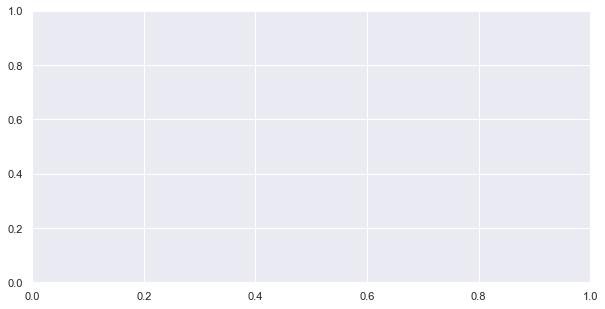

In [27]:
data = centerize(df)
kde2d(im, data)

In [24]:
print(xc_list)

sns.set()
fig, ax = plt.subplots(figsize = (10,5))
sns.kdeplot(data=xc_list, color='C3', bw_method=0.1)
plt.imshow(im, alpha=0.7)
plt.savefig('kde.png')

NameError: name 'xc_list' is not defined